<a href="https://www.kaggle.com/code/maushamjha/pima-diabetes-prediction-80-accuracy?scriptVersionId=104741389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## ABOUT DATASET:
# Context:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# import dataset:

In [2]:
data=pd.read_csv('../input/pima-diabetes/pimaindians-diabetes.data.csv',names=['pregnencies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetes_pedigree','age','outcome'])

In [3]:
data.head()

,pregnencies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnencies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   bloodpressure      768 non-null    int64  
 3   skinthickness      768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

pregnencies          0
glucose              0
bloodpressure        0
skinthickness        0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64

In [6]:
data.describe()

,pregnencies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

<AxesSubplot:>

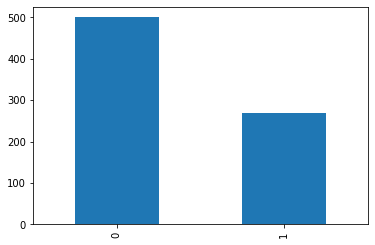

In [8]:
data['outcome'].value_counts().plot(kind='bar')

# data is biased
so we can't relly on accuracy score we have to use other method like precision or recall
# here we will use recall for evaluation of our model as in this problem false negative is more dangerous so we will go with recall 
as we don't want any women having diabetes and is predicted as not having diabetes it can put her life in danger

# we will work on the column one by one 
# PREGNENCIES COLUMN: 
no. of times women is pregnent

<AxesSubplot:>

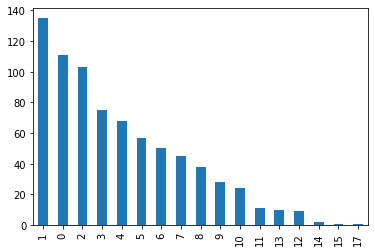

In [9]:
data['pregnencies'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

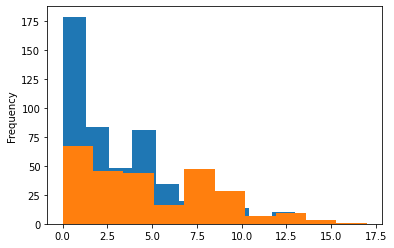

In [10]:
data[data['outcome']==0]['pregnencies'].plot(kind='hist')
data[data['outcome']==1]['pregnencies'].plot(kind='hist')

# right skewed

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='age'>

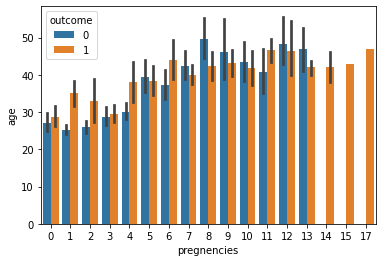

In [11]:
sns.barplot(data['pregnencies'],data['age'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies'>

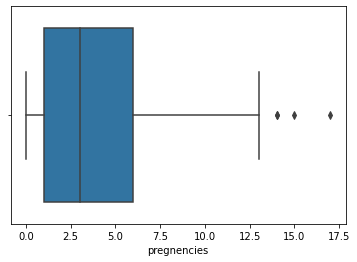

In [12]:
sns.boxplot(data['pregnencies'])

# outliers are present we need to remove it

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pregnencies', ylabel='Density'>

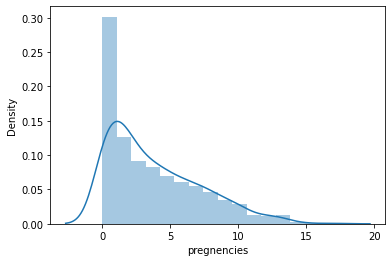

In [13]:
sns.distplot(data['pregnencies'])

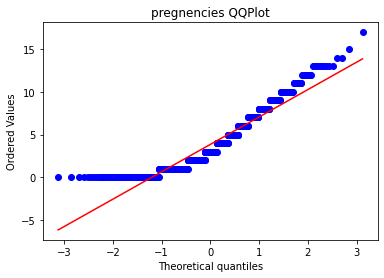

In [14]:
stats.probplot(data['pregnencies'],dist='norm',plot=plt)
plt.title('pregnencies QQPlot')
plt.show()

# we can see that this is right skewed and outliers are present so we can apply log transformation:
for right skewed data log transformation is a good choice as it changes larger value into smaller one and in case if result will not be upto the mark we will use power transformer

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pregnencies', ylabel='Density'>

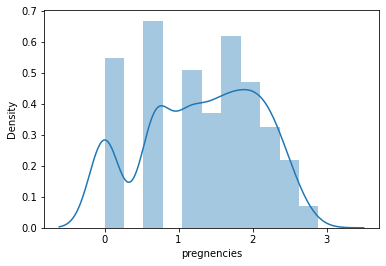

In [15]:
ft=FunctionTransformer(func=np.log1p)
data['pregnencies']=ft.fit_transform(data['pregnencies'])
sns.distplot(data['pregnencies'])


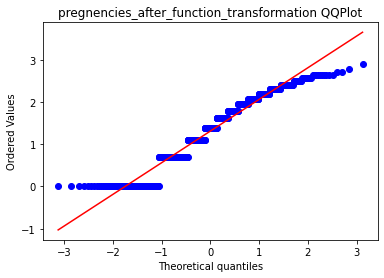

In [16]:
stats.probplot(data['pregnencies'],dist='norm',plot=plt)
plt.title('pregnencies_after_function_transformation QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies'>

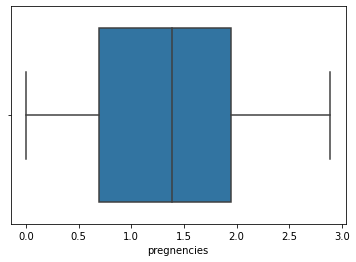

In [17]:
sns.boxplot(data['pregnencies'])

<AxesSubplot:ylabel='Frequency'>

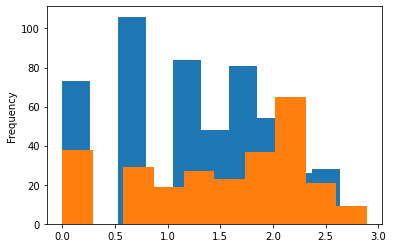

In [18]:
data[data['outcome']==0]['pregnencies'].plot(kind='hist')
data[data['outcome']==1]['pregnencies'].plot(kind='hist')

# Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution.


In [19]:
data

,pregnencies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree,age,outcome
0,1.945910,148,72,35,0,33.6,0.627,50,1
1,0.693147,85,66,29,0,26.6,0.351,31,0
2,2.197225,183,64,0,0,23.3,0.672,32,1
3,0.693147,89,66,23,94,28.1,0.167,21,0
4,0.000000,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,2.397895,101,76,48,180,32.9,0.171,63,0
764,1.098612,122,70,27,0,36.8,0.340,27,0
765,1.791759,121,72,23,112,26.2,0.245,30,0
766,0.693147,126,60,0,0,30.1,0.349,47,1


# Glucose:
now we will work on glucose column

<AxesSubplot:xlabel='glucose', ylabel='Count'>

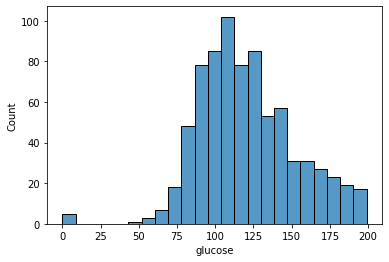

In [20]:
sns.histplot(data['glucose'])

<AxesSubplot:ylabel='Frequency'>

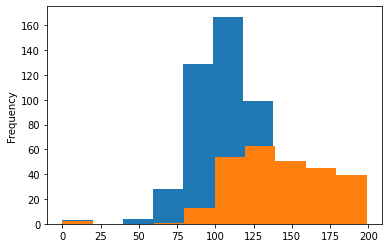

In [21]:
data[data['outcome']==0]['glucose'].plot(kind='hist')
data[data['outcome']==1]['glucose'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

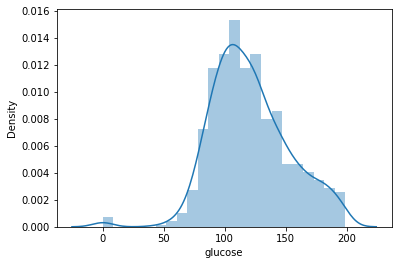

In [22]:
sns.distplot(data['glucose'])

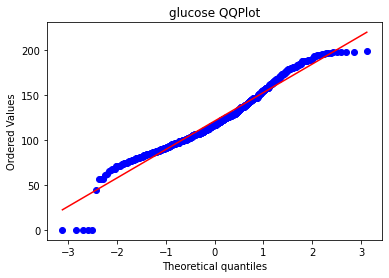

In [23]:
stats.probplot(data['glucose'],dist='norm',plot=plt)
plt.title('glucose QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='glucose'>

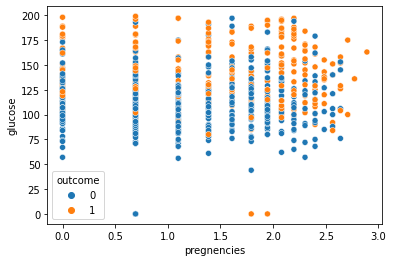

In [24]:
sns.scatterplot(data['pregnencies'],data['glucose'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='glucose'>

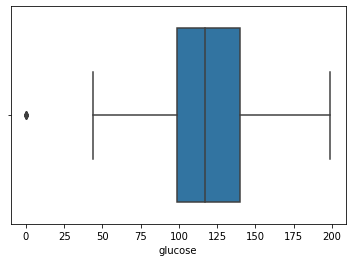

In [25]:
sns.boxplot(data['glucose'])

# there is only one outlier in this so we will drop the outlier
and distribution of glucose column is already good so we are not going to transform, although i have seen the result after applying yeo-johnson power transformer but it makes the distribution even bad that's why we will not use transformation on this

In [26]:
data=data[data['glucose']>0]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='glucose'>

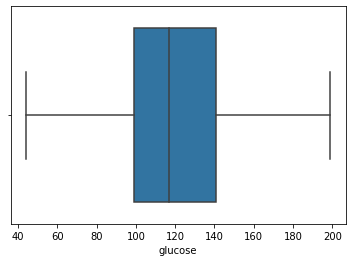

In [27]:
sns.boxplot(data['glucose'])

# Blood Pressure:


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bloodpressure', ylabel='Density'>

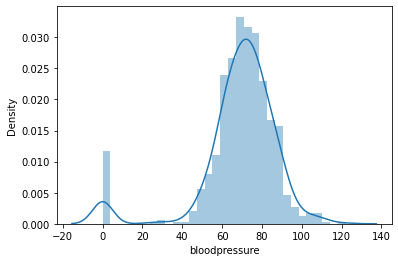

In [28]:
sns.distplot(data['bloodpressure'])

<AxesSubplot:ylabel='Frequency'>

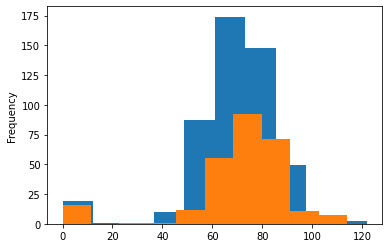

In [29]:
data[data['outcome']==0]['bloodpressure'].plot(kind='hist')
data[data['outcome']==1]['bloodpressure'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='bloodpressure'>

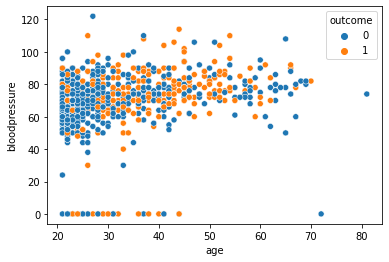

In [30]:
sns.scatterplot(data['age'],data['bloodpressure'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure'>

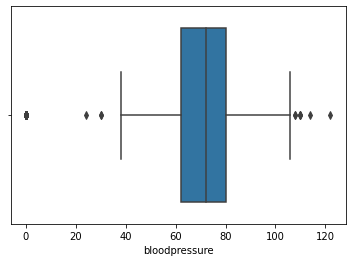

In [31]:
sns.boxplot(data['bloodpressure'])

# outlier is there

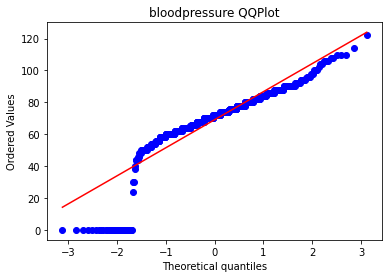

In [32]:
stats.probplot(data['bloodpressure'],dist='norm',plot=plt)
plt.title('bloodpressure QQPlot')
plt.show()

# we can see on QQ plot data is not normalized so we will use power transformation 


In [33]:
pt=PowerTransformer()
array=pt.fit_transform(data[['bloodpressure']])
data['bloodpressure']=pd.DataFrame(array)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


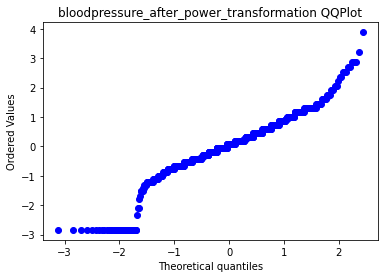

In [34]:
stats.probplot(data['bloodpressure'],dist='norm',plot=plt)
plt.title('bloodpressure_after_power_transformation QQPlot')
plt.show()

# using yeo-jonson transformation on bloodpressure 
has made our column more normalize we can also use box cox transformation as the difference between box-cox and yeo-johnson is only that box-cox is applicable only for +ve values while yeo-johnson is applied on both.power transformation is a general transformer which can be used for left skewed as well as right skewed data,it finds out optimat lambda to make the column normal distribution


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure'>

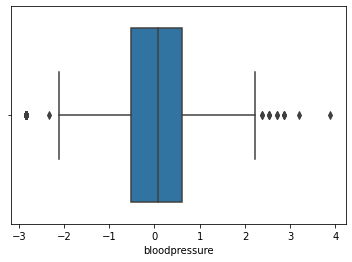

In [35]:
sns.boxplot(data['bloodpressure'])

# outlier treatment: we can use interquartile method if data is skewed and for normally distributed we can use z-score method
here i am using interquartile method

In [36]:
q1=data['bloodpressure'].quantile(.25)
q3=data['bloodpressure'].quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
data['bloodpressure']=np.where(data['bloodpressure']>upper_limit,upper_limit,
        np.where(data['bloodpressure']<lower_limit,lower_limit,data['bloodpressure']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure'>

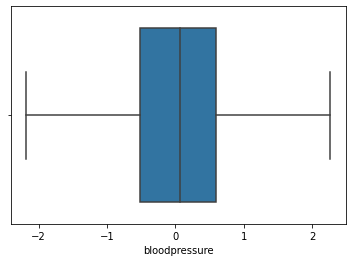

In [37]:
sns.boxplot(data['bloodpressure'])

# skinthickness :

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skinthickness', ylabel='Density'>

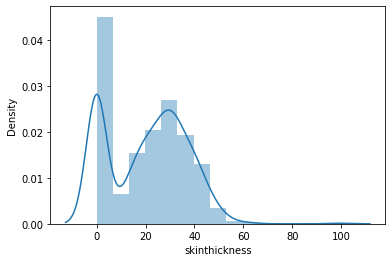

In [38]:
sns.distplot(data['skinthickness'])

<AxesSubplot:ylabel='Frequency'>

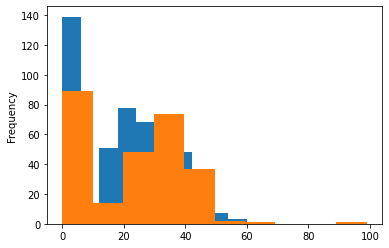

In [39]:
data[data['outcome']==0]['skinthickness'].plot(kind='hist')
data[data['outcome']==1]['skinthickness'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='skinthickness'>

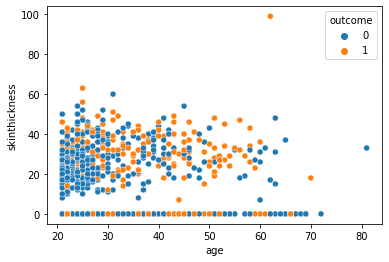

In [40]:
sns.scatterplot(data['age'],data['skinthickness'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure', ylabel='skinthickness'>

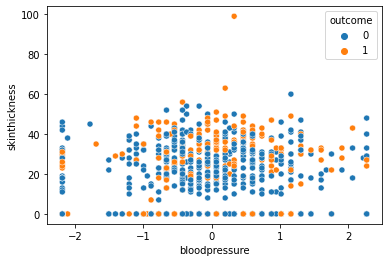

In [41]:
sns.scatterplot(data['bloodpressure'],data['skinthickness'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='skinthickness'>

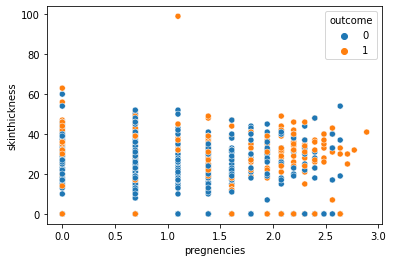

In [42]:
sns.scatterplot(data['pregnencies'],data['skinthickness'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skinthickness', ylabel='Density'>

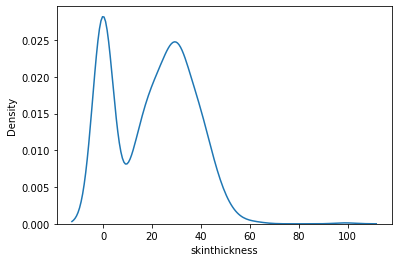

In [43]:
sns.distplot(data['skinthickness'],hist=False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='skinthickness'>

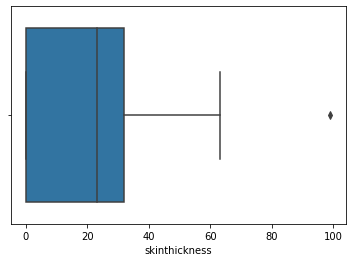

In [44]:
sns.boxplot(data['skinthickness'])

# there is one outlier i am going to drop this

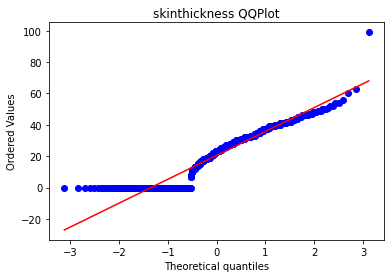

In [45]:
stats.probplot(data['skinthickness'],dist='norm',plot=plt)
plt.title('skinthickness QQPlot')
plt.show()

In [46]:
data=data[data['skinthickness']<80]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='skinthickness'>

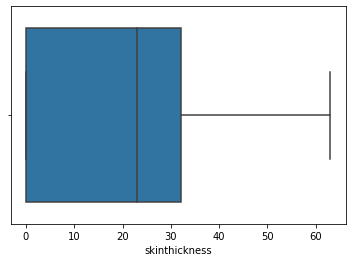

In [47]:
sns.boxplot(data['skinthickness'])

# insuline :

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insulin', ylabel='Density'>

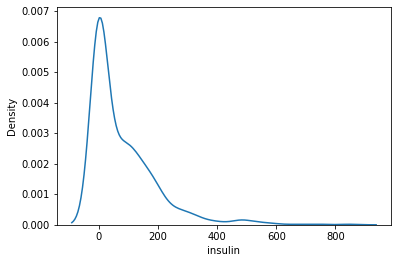

In [48]:
sns.distplot(data['insulin'],hist=False)

# right skewed data

<AxesSubplot:ylabel='Frequency'>

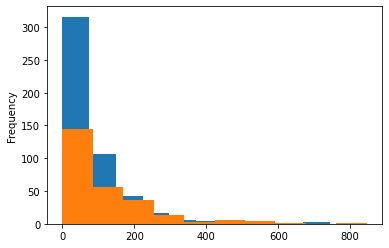

In [49]:
data[data['outcome']==0]['insulin'].plot(kind='hist')
data[data['outcome']==1]['insulin'].plot(kind='hist')

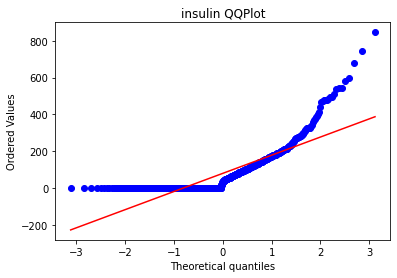

In [50]:
stats.probplot(data['insulin'],dist='norm',plot=plt)
plt.title('insulin QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin'>

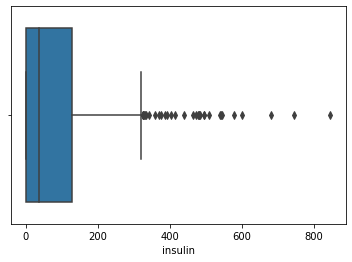

In [51]:
sns.boxplot(data['insulin'])

# outlier is present

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure', ylabel='insulin'>

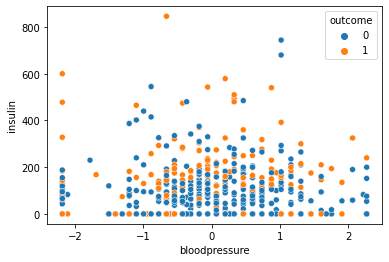

In [52]:
sns.scatterplot(data['bloodpressure'],data['insulin'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='insulin'>

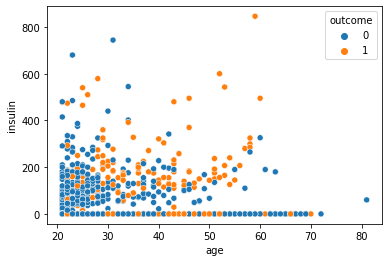

In [53]:
sns.scatterplot(data['age'],data['insulin'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='insulin'>

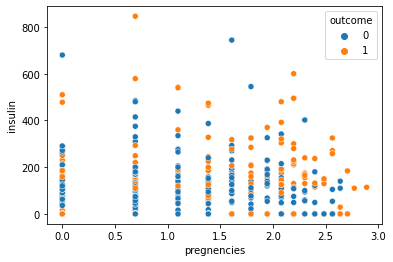

In [54]:
sns.scatterplot(data['pregnencies'],data['insulin'],hue=data['outcome'])

# apply log transformation as data is right skewed
for left skewed one can use square transformation or power transformation( power transformation can be used on any type of distribution)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insulin', ylabel='Density'>

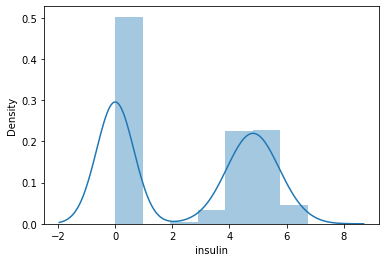

In [55]:
ft=FunctionTransformer(func=np.log1p)
data['insulin']=ft.fit_transform(data['insulin'])
sns.distplot(data['insulin'])

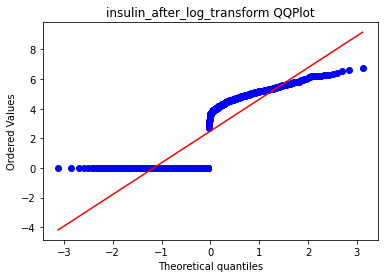

In [56]:
stats.probplot(data['insulin'],dist='norm',plot=plt)
plt.title('insulin_after_log_transform QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin'>

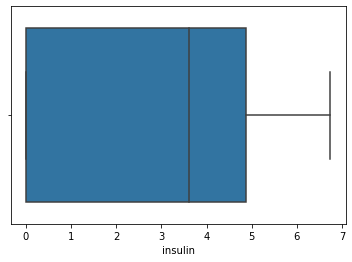

In [57]:
sns.boxplot(data['insulin'])

# log transformation is robust to outlier 
see the result log transformation also handle the outlier in insuline

# BMI :

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

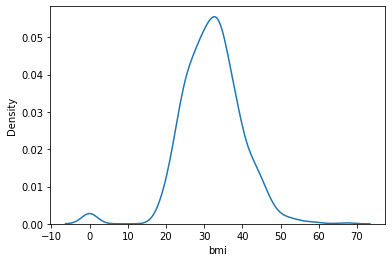

In [58]:
sns.distplot(data['bmi'],hist=False)

<AxesSubplot:ylabel='Frequency'>

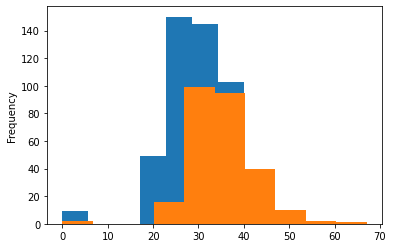

In [59]:
data[data['outcome']==0]['bmi'].plot(kind='hist')
data[data['outcome']==1]['bmi'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

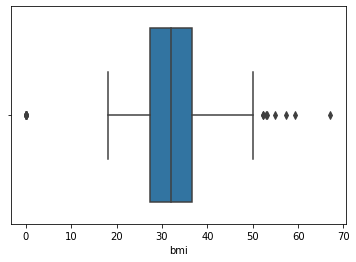

In [60]:
sns.boxplot(data['bmi'])

# outlier is there

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure', ylabel='bmi'>

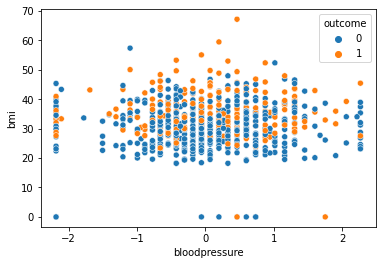

In [61]:
sns.scatterplot(data['bloodpressure'],data['bmi'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin', ylabel='bmi'>

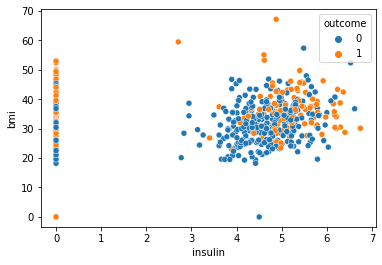

In [62]:
sns.scatterplot(data['insulin'],data['bmi'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='bmi'>

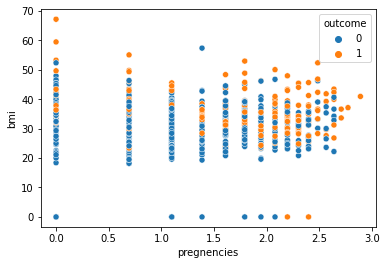

In [63]:
sns.scatterplot(data['pregnencies'],data['bmi'],hue=data['outcome'])

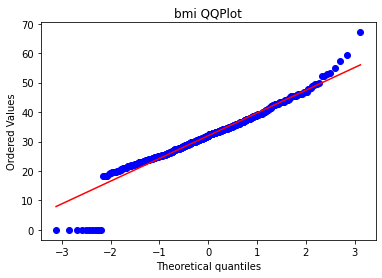

In [64]:
stats.probplot(data['bmi'],dist='norm',plot=plt)
plt.title('bmi QQPlot')
plt.show()

# on Observong QQ Plot we can say distribution is already nearly normalized

# outlier treatment
using interquartile method

In [65]:
q1=data['bmi'].quantile(.25)
q3=data['bmi'].quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
data['bmi']=np.where(data['bmi']>upper_limit,upper_limit,
        np.where(data['bmi']<lower_limit,lower_limit,data['bmi']))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

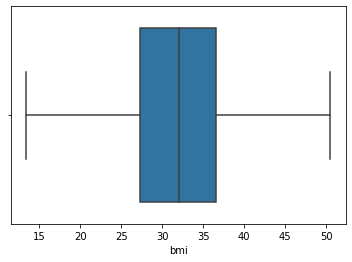

In [66]:
sns.boxplot(data['bmi'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

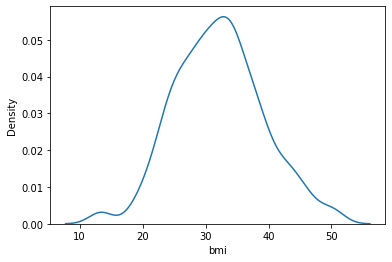

In [67]:
sns.distplot(data['bmi'],hist=False)

# diabetes_pedigree :

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes_pedigree', ylabel='Density'>

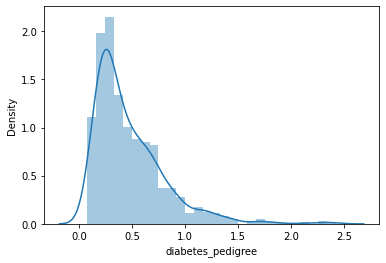

In [68]:
sns.distplot(data['diabetes_pedigree'])

# right skewed

<AxesSubplot:ylabel='Frequency'>

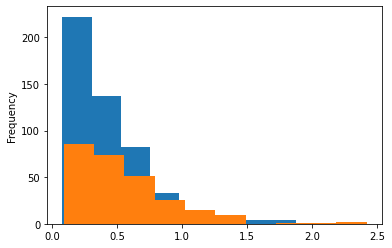

In [69]:
data[data['outcome']==0]['diabetes_pedigree'].plot(kind='hist')
data[data['outcome']==1]['diabetes_pedigree'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes_pedigree'>

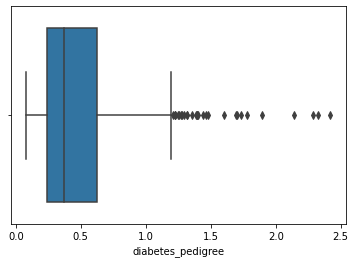

In [70]:
sns.boxplot((data['diabetes_pedigree']))

# outlier is present

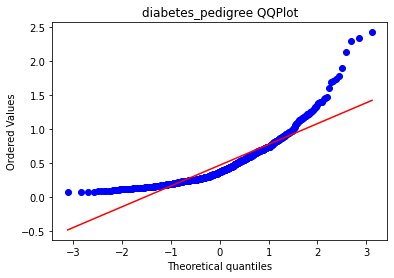

In [71]:
stats.probplot(data['diabetes_pedigree'],dist='norm',plot=plt)
plt.title('diabetes_pedigree QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin', ylabel='diabetes_pedigree'>

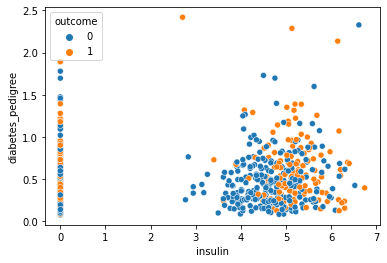

In [72]:
sns.scatterplot(data['insulin'],data['diabetes_pedigree'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='diabetes_pedigree'>

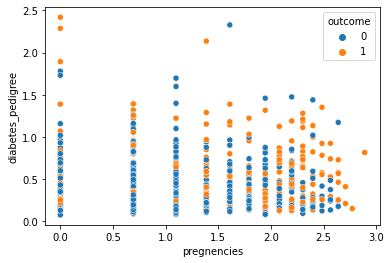

In [73]:
sns.scatterplot(data['pregnencies'],data['diabetes_pedigree'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='diabetes_pedigree'>

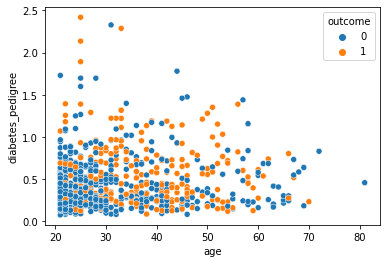

In [74]:
sns.scatterplot(data['age'],data['diabetes_pedigree'],hue=data['outcome'])

# apply power transformation
i have also applied log transformation but i got best result after using power transformation

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes_pedigree', ylabel='Density'>

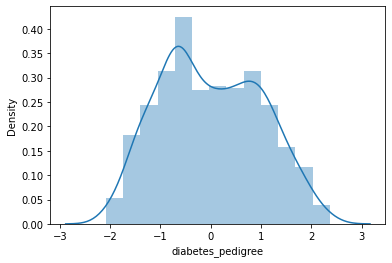

In [75]:
pt=PowerTransformer()
array=pt.fit_transform(data[['diabetes_pedigree']])
data['diabetes_pedigree']=pd.DataFrame(array)
sns.distplot(data['diabetes_pedigree'])

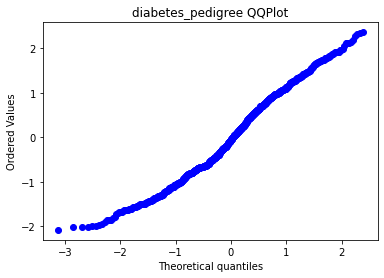

In [76]:
stats.probplot(data['diabetes_pedigree'],dist='norm',plot=plt)
plt.title('diabetes_pedigree QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes_pedigree'>

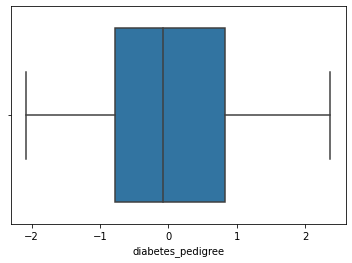

In [77]:
sns.boxplot(data['diabetes_pedigree'])

# here outlier is also get treated well with transformation 

# Age :

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

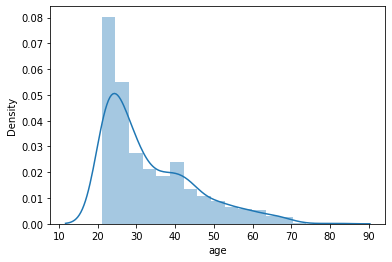

In [78]:
sns.distplot(data['age'])

# right skewed

<AxesSubplot:ylabel='Frequency'>

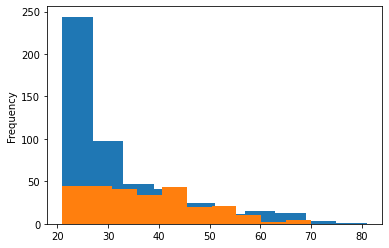

In [79]:
data[data['outcome']==0]['age'].plot(kind='hist')
data[data['outcome']==1]['age'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

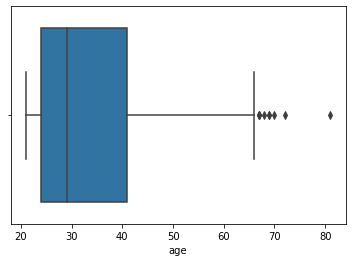

In [80]:
sns.boxplot(data['age'])

# outlier is present

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='pregnencies'>

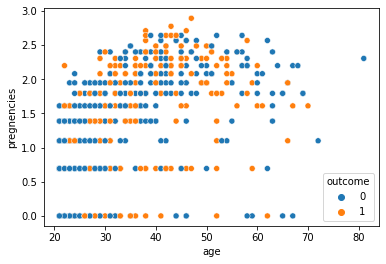

In [81]:
sns.scatterplot(data['age'],data['pregnencies'],hue=data['outcome'])

# applying power transformation to make the distribution normal

In [82]:
pt=PowerTransformer()
array=pt.fit_transform(data[['age']])
data['age']=pd.DataFrame(array)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

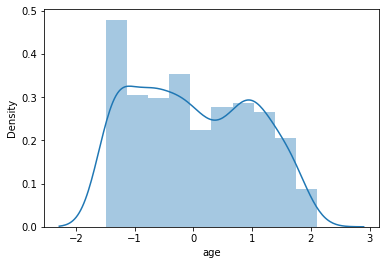

In [83]:
sns.distplot(data['age'])

<AxesSubplot:ylabel='Frequency'>

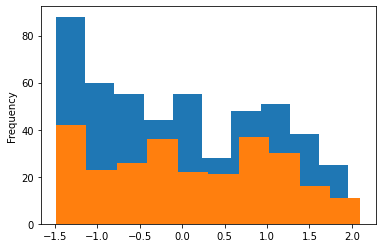

In [84]:
data[data['outcome']==0]['age'].plot(kind='hist')
data[data['outcome']==1]['age'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

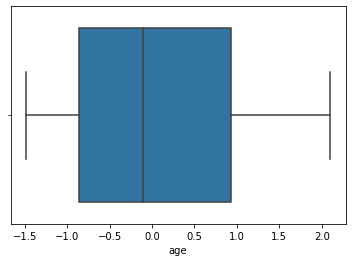

In [85]:
sns.boxplot(data['age'])

# outliers get treated with transformation


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


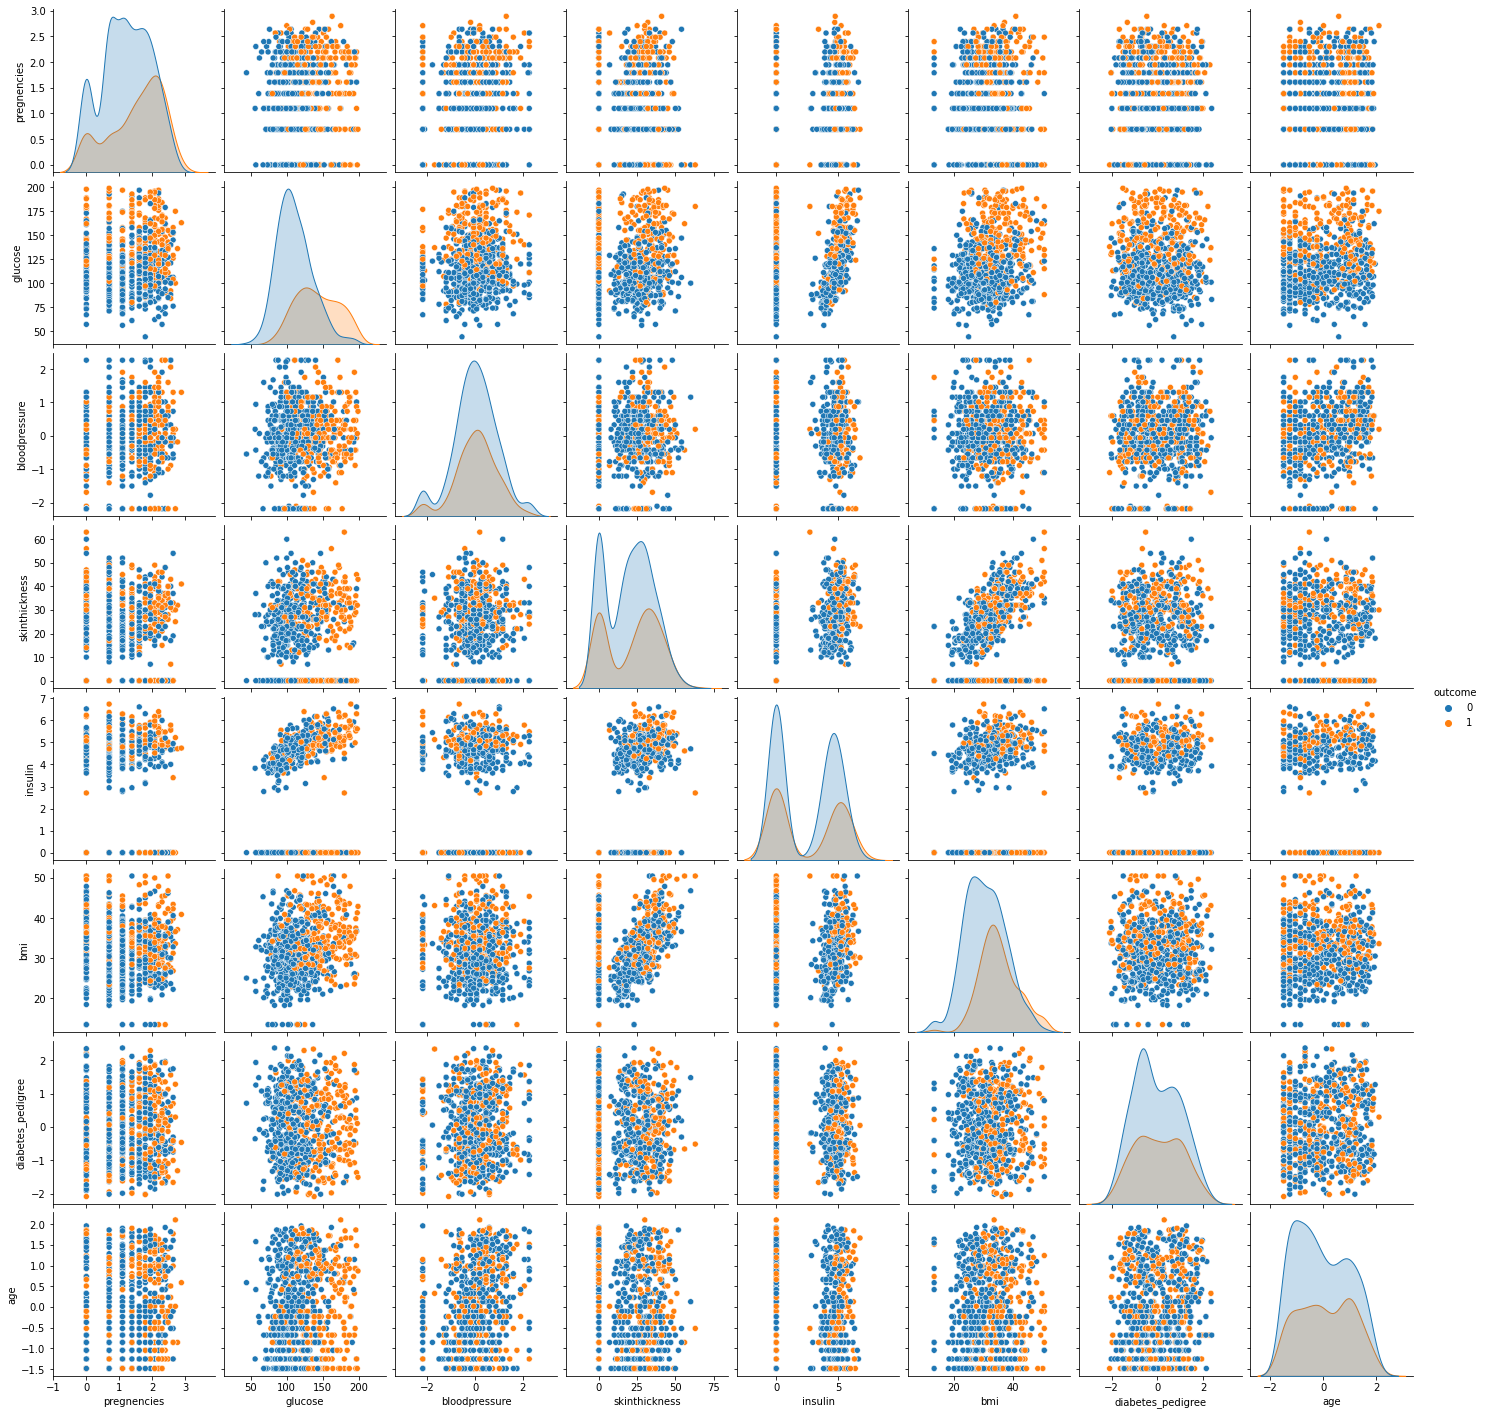

In [86]:
sns.pairplot(data,'outcome')

In [87]:
data.isnull().sum()

pregnencies          0
glucose              0
bloodpressure        5
skinthickness        0
insulin              0
bmi                  0
diabetes_pedigree    6
age                  6
outcome              0
dtype: int64

In [88]:
data.dropna(inplace=True)

# scaling and feature extraction
we have done yeo-jonson transformation on 2 or 3 columns in yeo-johnson power transformer standardization is internally done so one can skip that columns and apply standardscaler on other remaining columns

In [89]:
sc=StandardScaler()
x=data.drop(columns='outcome')
x=sc.fit_transform(x)
pca=PCA(5)
x=pca.fit_transform(x)
y=data['outcome']

# train test split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2,stratify=y)

# training and evaluation

In [91]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
l=[gnb,bnb,lr,svm,dt,rf,kn,ada,bag,gb,xgb]

In [92]:
recall=[]
accuracy=[]
precision=[]
name=[]
def train(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    confusion_matrix(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    name.append(model)

In [93]:
for model in l:
    train(model)

In [94]:
accuracy

[0.7960526315789473,
 0.6973684210526315,
 0.7763157894736842,
 0.7894736842105263,
 0.7171052631578947,
 0.743421052631579,
 0.7368421052631579,
 0.8026315789473685,
 0.7302631578947368,
 0.756578947368421,
 0.6973684210526315]

In [95]:
precision

[0.775,
 0.6206896551724138,
 0.7209302325581395,
 0.7441860465116279,
 0.6,
 0.6590909090909091,
 0.6382978723404256,
 0.7446808510638298,
 0.65,
 0.6904761904761905,
 0.574468085106383]

In [96]:
data=pd.DataFrame({"algorithm":['gnb','bnb','lr','svm','dt','rf','knn','ada','bag','gb','xgb'],"accuracy":accuracy,"precision":precision,'recall':recall})

In [97]:
data.sort_values('recall',ascending=False)

,algorithm,accuracy,precision,recall
7,ada,0.802632,0.744681,0.660377
3,svm,0.789474,0.744186,0.603774
0,gnb,0.796053,0.775000,0.584906
2,lr,0.776316,0.720930,0.584906
4,dt,0.717105,0.600000,0.566038
6,knn,0.736842,0.638298,0.566038
5,rf,0.743421,0.659091,0.547170
9,gb,0.756579,0.690476,0.547170
10,xgb,0.697368,0.574468,0.509434
8,bag,0.730263,0.650000,0.490566


# please upvote if YOU find it useful